<a href="https://colab.research.google.com/github/anamitranandi7/UpSkill-Campus/blob/main/Prediction_of_Agriculture_Crop_Production_in_India_Anamitra_Nandi_USC_UCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Prediction of Agriculture Crop Production in India

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")
import os

In [4]:
data1=pd.read_csv("/datafile (1) (1).csv")
data2=pd.read_csv("/datafile (2) (1).csv")
data3=pd.read_csv("/datafile (3) (1).csv")
datafile=pd.read_csv("/datafile (4).csv")
produce=pd.read_csv("/produce (1).csv")

In [5]:
data1 = data1.rename(columns={
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

data1.head()

,Crop,State,Cost_A2_FL,Cost_C2,Cost_Production,Yield
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


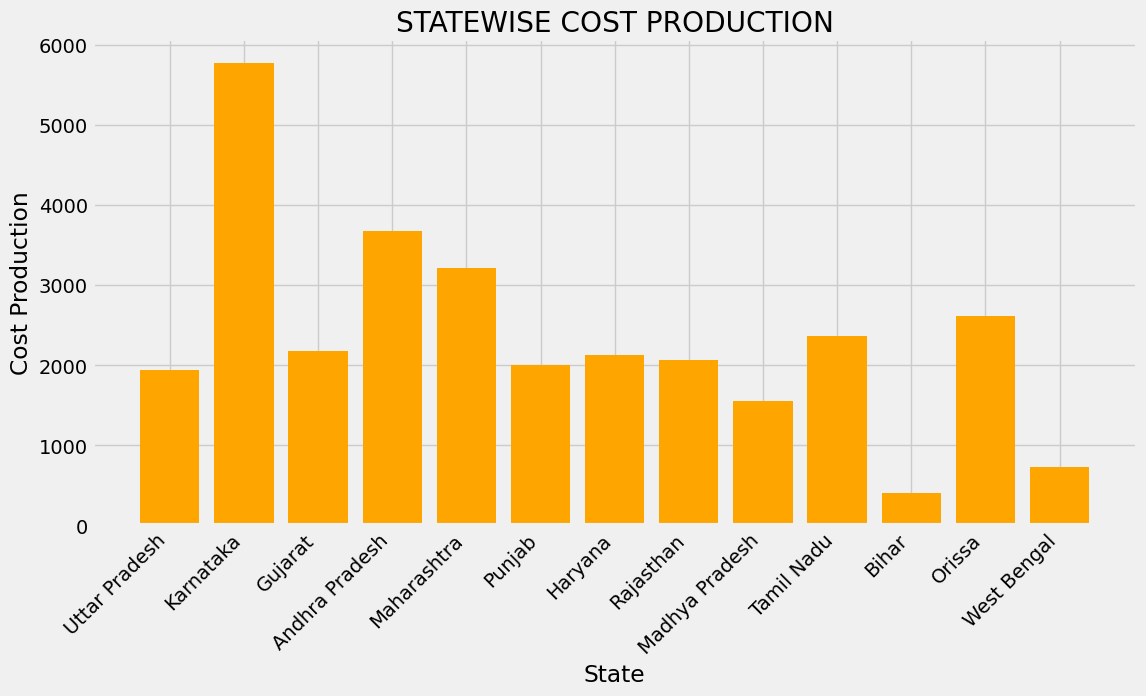

In [8]:
plt.bar(x='State',height='Cost_Production',data=data1,color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('STATEWISE COST PRODUCTION')
plt.xlabel("State")
plt.ylabel("Cost Production")
plt.show()

In [9]:
data2.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [10]:
data3.head()

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN


In [11]:
data3.dropna(axis=1)

,Crop,Variety
0,Paddy,Chinsurah Rice (IET 19140)
1,Paddy,(CNI 383-5-11)
2,Paddy,IGKVR-1 (IET 19569)
3,Paddy,IGKVR-2 (IET 19795)
4,Paddy,CR Dhan 401 (REETA)
...,...,...
73,Mesta,SHRESTHA (JRM-5)
74,Cotton,CNH012
75,Cotton,CICR-3 (CISA 614)
76,Cotton,VBCH 2231


In [12]:
data1.shape

(49, 6)

In [14]:
data1.isnull().sum()

Crop               0
State              0
Cost_A2_FL         0
Cost_C2            0
Cost_Production    0
Yield              0
dtype: int64

<Axes: >

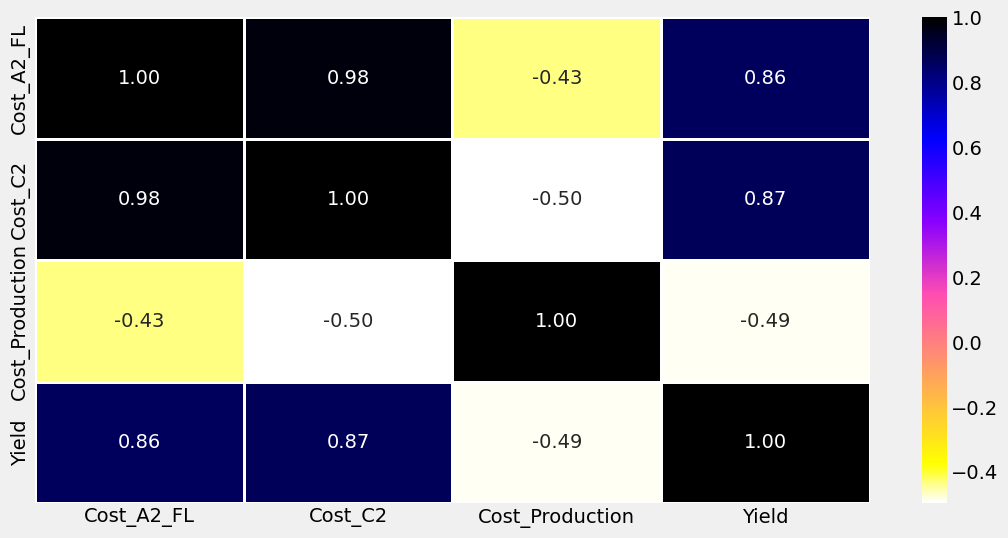

In [16]:
sns.heatmap(data1.corr(),annot=True,cmap='gnuplot2_r',fmt='.2f',linewidths=2)

In [17]:
avg_yield = data1.groupby('Yield')['Cost_A2_FL','Cost_C2','Cost_Production'].mean()
avg_yield.head(10)

,Cost_A2_FL,Cost_C2,Cost_Production
Yield,,,
1.32,6440.64,7868.64,5777.48
3.01,5483.54,8266.98,2614.14
4.05,6204.23,9165.59,2068.67
4.71,13647.10,17314.20,3484.01
5.90,6684.18,13209.32,2228.97
6.42,17051.66,24171.65,3670.54
6.70,10780.76,15371.45,2261.24
6.83,8552.69,12610.85,1691.66
7.47,10593.15,16528.68,2172.46


In [18]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


In [19]:
crop_list = data1['Crop'].unique()
for crop in crop_list:
    print(crop)

ARHAR
COTTON
GRAM
GROUNDNUT
MAIZE
MOONG
PADDY
RAPESEED AND MUSTARD
SUGARCANE
WHEAT


In [20]:
datafile.describe()

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000


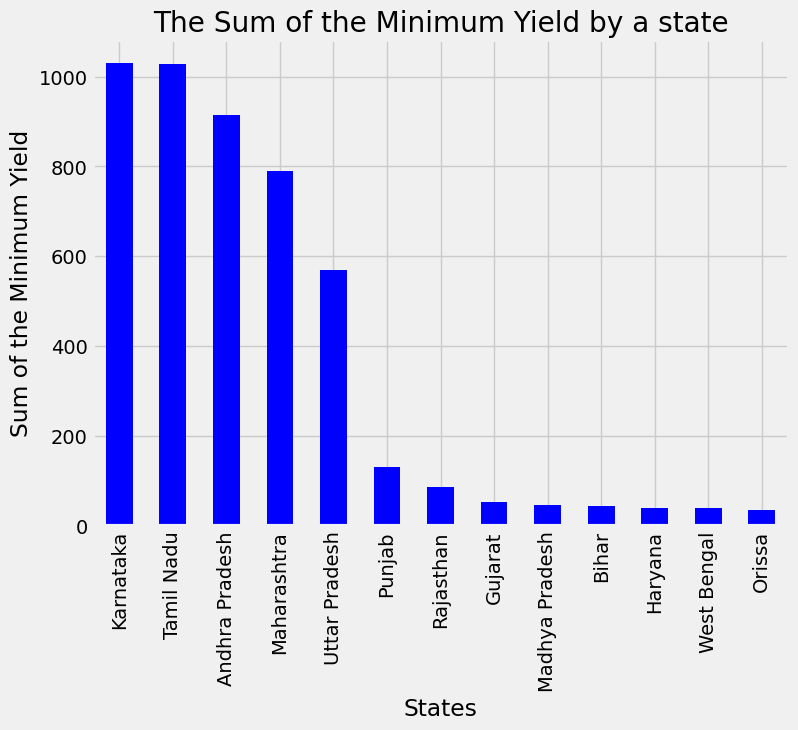

In [21]:
import matplotlib.pyplot as plt
data1.groupby('State')['Yield'].sum().sort_values(ascending=False).plot(kind='bar', title="The Sum of the Minimum Yield by a state", figsize=(8, 6), color='blue')
plt.xlabel("States")
plt.ylabel("Sum of the Minimum Yield")
plt.show()

In [22]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz


X = data1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]
y = data1['Yield']

print(X)
print(y)

    Cost_A2_FL   Cost_C2  Cost_Production
0      9794.05  23076.74          1941.55
1     10593.15  16528.68          2172.46
2     13468.82  19551.90          1898.30
3     17051.66  24171.65          3670.54
4     17130.55  25270.26          2775.80
5     23711.44  33116.82          2539.47
6     29047.10  50828.83          2003.76
7     29140.77  44756.72          2509.99
8     29616.09  42070.44          2179.26
9     29918.97  44018.18          2127.35
10     8552.69  12610.85          1691.66
11     9803.89  16873.17          1551.94
12    12833.04  21618.43          1882.68
13    12985.95  18679.33          2277.68
14    14421.98  26762.09          1559.04
15    13647.10  17314.20          3484.01
16    21229.01  30434.61          2554.91
17    22507.86  30393.66          2358.00
18    22951.28  30114.45          1918.92
19    26078.66  32683.46          3207.35
20    13513.92  19857.70           404.43
21    13792.85  20671.54           581.69
22    14421.46  19810.29          

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor()
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
evaluation = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation[model_name] = {'MSE': mse, 'MAE': mae}
print('Evaluation Results:')
for model_name, metrics in evaluation.items():
    print(f'{model_name}:')
    print(f'MSE: {metrics["MSE"]}')
    print(f'MAE: {metrics["MAE"]}')
    print('---')
decision_tree_predictions = predictions['Decision Tree']
print(decision_tree_predictions)

Evaluation Results:
Decision Tree:
MSE: 7381.614420000003
MAE: 30.248000000000008
---
Linear Regression:
MSE: 28230.054046904657
MAE: 124.1650703739479
---
XGBoost:
MSE: 113.11858814325804
MAE: 6.5234736404419
---
Random Forest:
MSE: 4355.336231205007
MAE: 24.45137000000002
---
[  9.59  31.1   39.83 744.01  13.45   4.71   5.9    5.9   36.61  12.69]


In [25]:
X_pred = pd.DataFrame({
    'Cost_A2_FL': [100, 200, 150],
    'Cost_C2': [120, 180, 140],
    'Cost_Production': [500, 600, 550]
})


predictions_pred = {}
for model_name, model in models.items():
    predictions_pred[model_name] = model.predict(X_pred)

predictions_pred

{'Decision Tree': array([23.56, 23.56, 23.56]),
 'Linear Regression': array([-148.25183944, -152.47410372, -150.43817345]),
 'XGBoost': array([20.444218, 20.444218, 20.444218], dtype=float32),
 'Random Forest': array([29.7571, 29.6937, 29.6937])}